In [55]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from collections import defaultdict
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns

pd.options.plotting.backend = "plotly"
# from plotnine import ggplot, aes, geom_line 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import re

In [15]:
df = pd.read_csv('notebook\data\stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.dtypes

gender              object
race                object
parent_education    object
lunch               object
prep_course         object
math                 int64
reading              int64
writing              int64
dtype: object

In [17]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

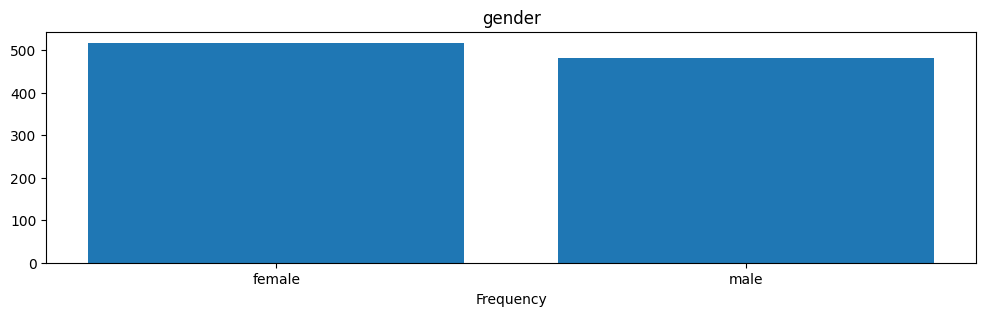

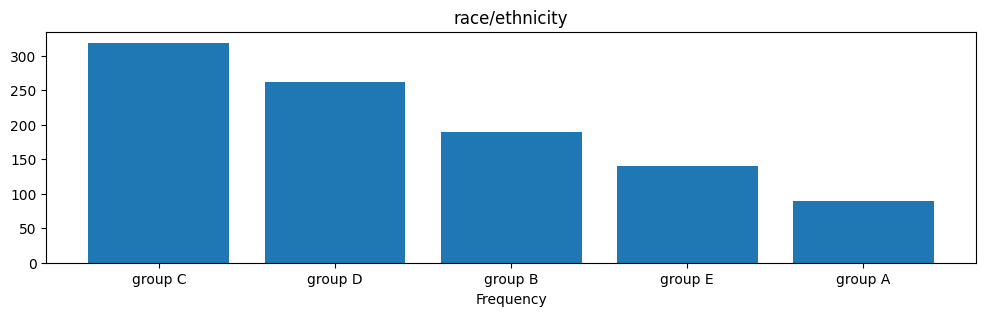

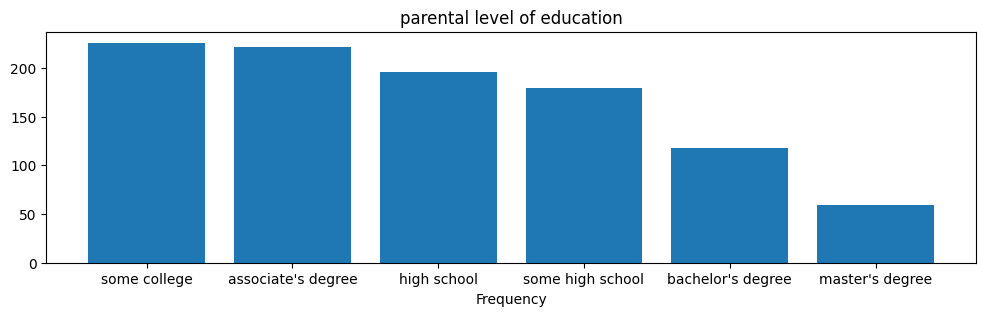

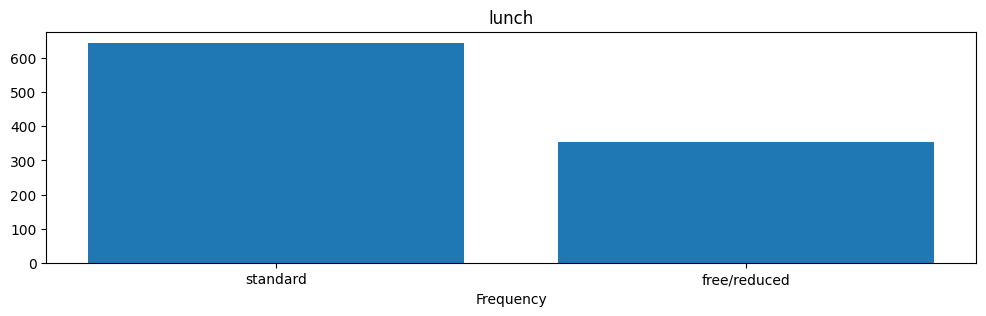

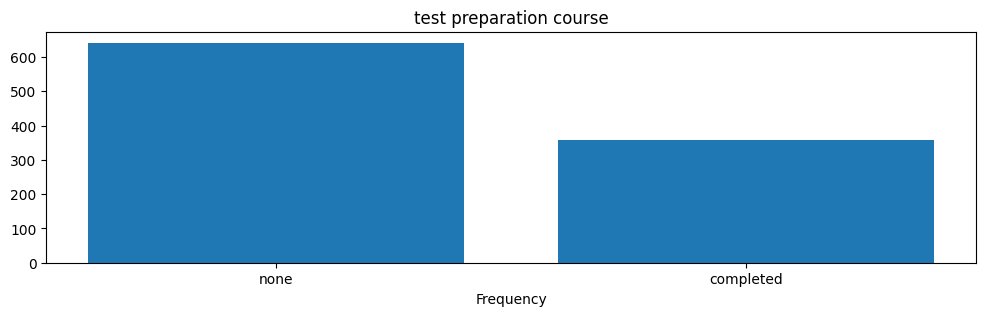

In [19]:
def barPlot(variable):
    var = df[variable]
    varValue = var.value_counts()
    
    plt.figure(figsize=(12,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.xlabel("Frequency")
    plt.title(variable)
    plt.show()


variable_list = ["gender","race/ethnicity","parental level of education","lunch","test preparation course"]
for x in variable_list:
    barPlot(x)

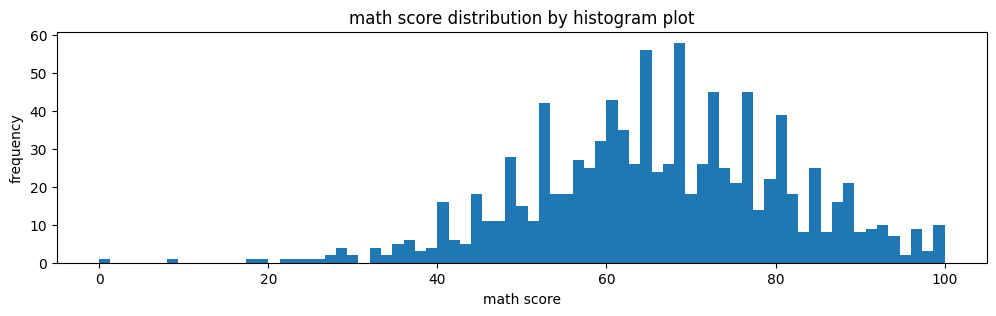

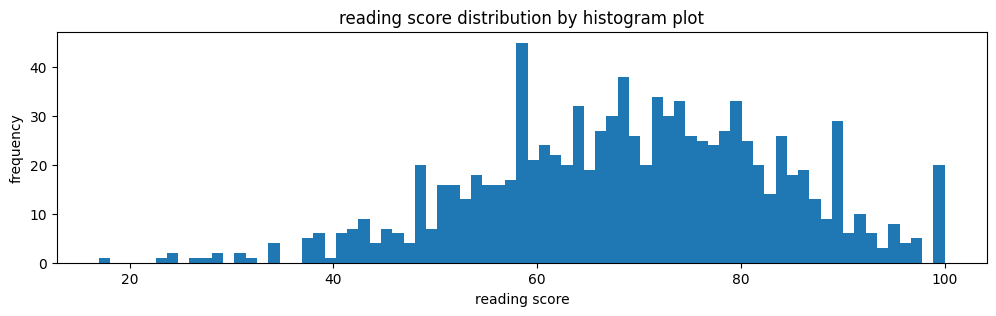

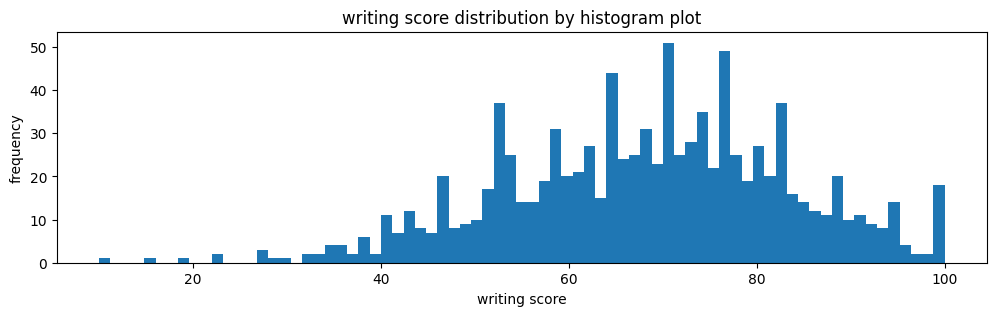

In [20]:
def histPlot(variable):
    plt.figure(figsize =(12,3))
    plt.hist(df[variable],bins = 75)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distribution by histogram plot".format(variable))
    plt.show()

NumericalVariables = ["math score","reading score","writing score"]
for i in NumericalVariables:
    histPlot(i)

In [21]:
df[["math score","race/ethnicity"]].groupby(["race/ethnicity"], as_index = False).mean().sort_values(by="math score", ascending = False)

,race/ethnicity,math score
4,group E,73.821429
3,group D,67.362595
2,group C,64.463950
1,group B,63.452632
0,group A,61.629213


In [22]:
df[["writing score","race/ethnicity"]].groupby(["race/ethnicity"], as_index = False).mean().sort_values(by="writing score", ascending = False)

,race/ethnicity,writing score
4,group E,71.407143
3,group D,70.145038
2,group C,67.827586
1,group B,65.600000
0,group A,62.674157


In [23]:
df[["reading score","race/ethnicity"]].groupby(["race/ethnicity"], as_index = False).mean().sort_values(by="reading score", ascending = False)

,race/ethnicity,reading score
4,group E,73.028571
3,group D,70.030534
2,group C,69.103448
1,group B,67.352632
0,group A,64.674157


When observed from Group A to Group E sequentially, we can conclude that the average scores decrease for each subject.

In [24]:
df[["gender","reading score"]].groupby("gender").mean().sort_values(by="reading score", ascending = False)

,reading score
gender,
female,72.608108
male,65.473029


In [25]:
df[["gender","math score"]].groupby("gender").mean().sort_values(by="math score", ascending = False)


,math score
gender,
male,68.728216
female,63.633205


In [26]:
df[["gender","writing score"]].groupby("gender").mean().sort_values(by="writing score", ascending = False)

,writing score
gender,
female,72.467181
male,63.311203


In [27]:
df[["lunch","writing score"]].groupby("lunch").mean().sort_values(by="writing score", ascending = False)

,writing score
lunch,
standard,70.823256
free/reduced,63.022535


In [28]:
df[["lunch","math score"]].groupby("lunch").mean().sort_values(by="math score", ascending = False)


,math score
lunch,
standard,70.034109
free/reduced,58.921127


In [29]:
df[["lunch","reading score"]].groupby("lunch").mean().sort_values(by="reading score", ascending = False)

,reading score
lunch,
standard,71.654264
free/reduced,64.653521


In [30]:
df[["parental level of education","writing score"]].groupby("parental level of education").mean().sort_values(by="writing score", ascending = False)

,writing score
parental level of education,
master's degree,75.677966
bachelor's degree,73.381356
associate's degree,69.896396
some college,68.840708
some high school,64.888268
high school,62.448980


In [31]:
df[["parental level of education","reading score"]].groupby("parental level of education").mean().sort_values(by="reading score", ascending = False)


,reading score
parental level of education,
master's degree,75.372881
bachelor's degree,73.000000
associate's degree,70.927928
some college,69.460177
some high school,66.938547
high school,64.704082


In [32]:
df[["parental level of education","math score"]].groupby("parental level of education").mean().sort_values(by="math score", ascending = False)

,math score
parental level of education,
master's degree,69.745763
bachelor's degree,69.389831
associate's degree,67.882883
some college,67.128319
some high school,63.497207
high school,62.137755


In [33]:
df[["test preparation course","writing score"]].groupby("test preparation course").mean().sort_values(by="writing score", ascending = False)

,writing score
test preparation course,
completed,74.418994
none,64.504673


In [34]:
df[["test preparation course","reading score"]].groupby("test preparation course").mean().sort_values(by="reading score", ascending = False)

,reading score
test preparation course,
completed,73.893855
none,66.534268


In [35]:
df[["test preparation course","math score"]].groupby("test preparation course").mean().sort_values(by="math score", ascending = False)

,math score
test preparation course,
completed,69.695531
none,64.077882


In [37]:
def detectOutliers(df,features):
    outliers_indices = []
    for c in features:
        # Q1
        Q1 = np.percentile(df[c],25)
        # Q3
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 -Q1
        # outlier step value
        outlierStepValue = IQR * 1.5
        outlierListColumn = df[((df[c] < Q1 - outlierStepValue) | (df[c] > Q3 + outlierStepValue))].index
        outliers_indices.extend(outlierListColumn)
        
    outliers_indices = Counter(outliers_indices)
    multiple_outliers = list(i for i, v in outliers_indices.items() if v > 2)
    return multiple_outliers

In [38]:
df.loc[detectOutliers(df,["math score","reading score","writing score"])]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23


In [39]:
df = df.drop(detectOutliers(df,["math score","reading score","writing score"]),axis = 0).reset_index(drop = True)

In [40]:
df.loc[detectOutliers(df,["math score","reading score","writing score"])]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [41]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

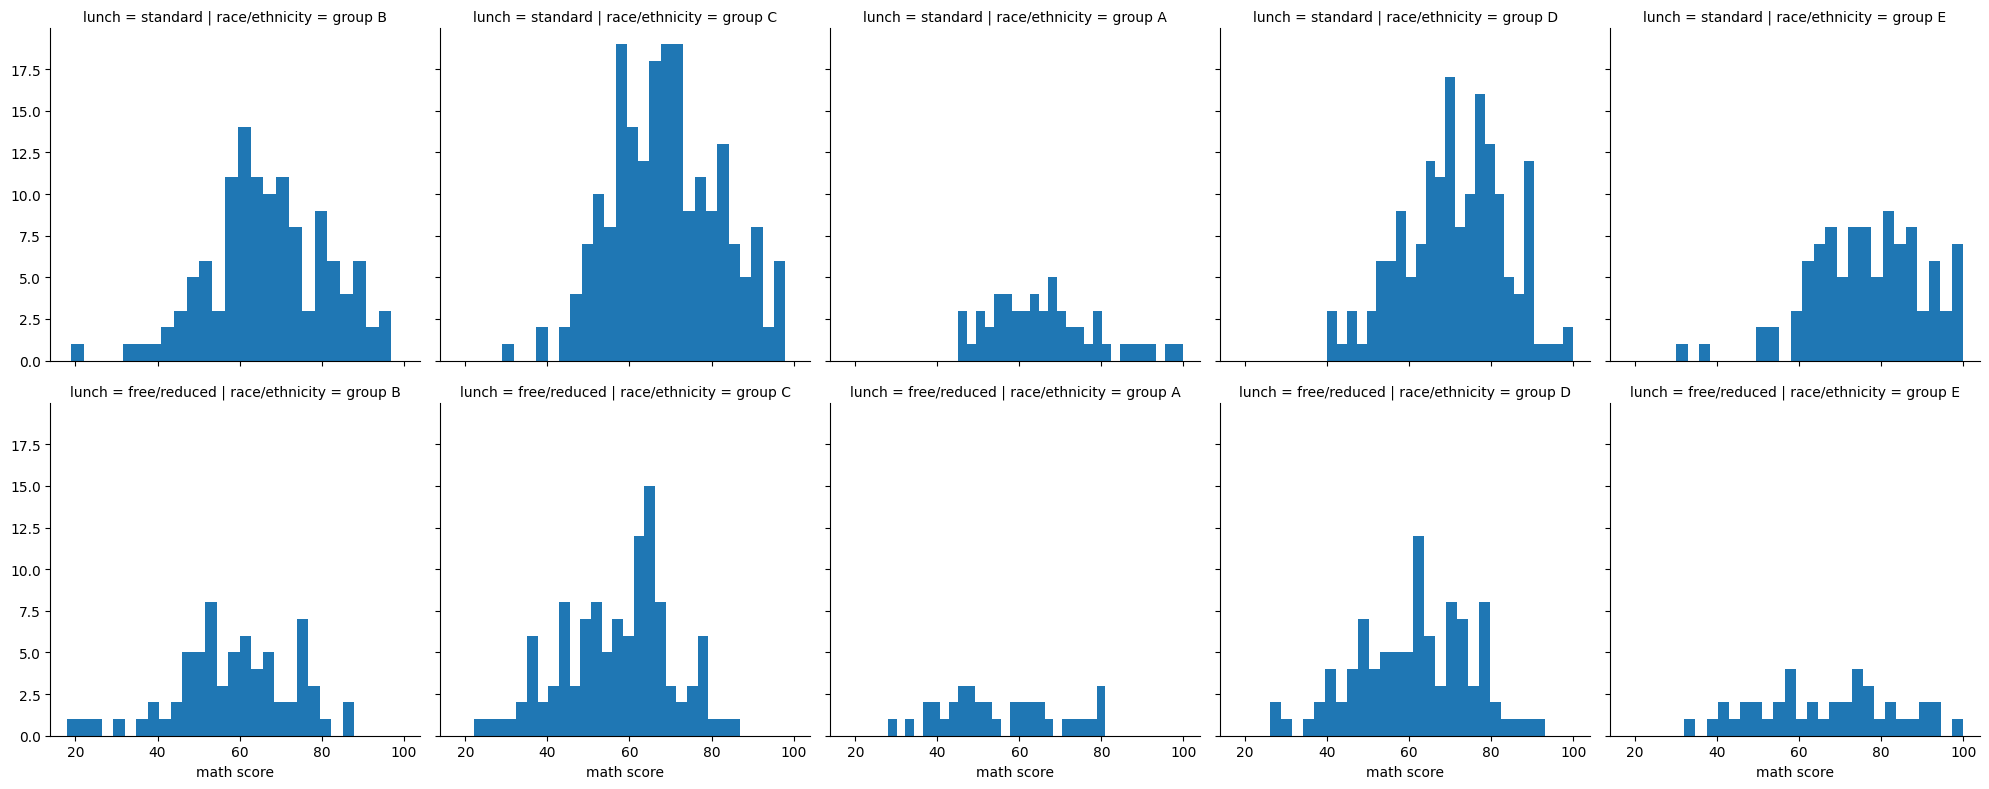

In [45]:
g = sns.FacetGrid(df, col = "race/ethnicity", row = "lunch", height = 4)
g.map(plt.hist,"math score",bins = 25)

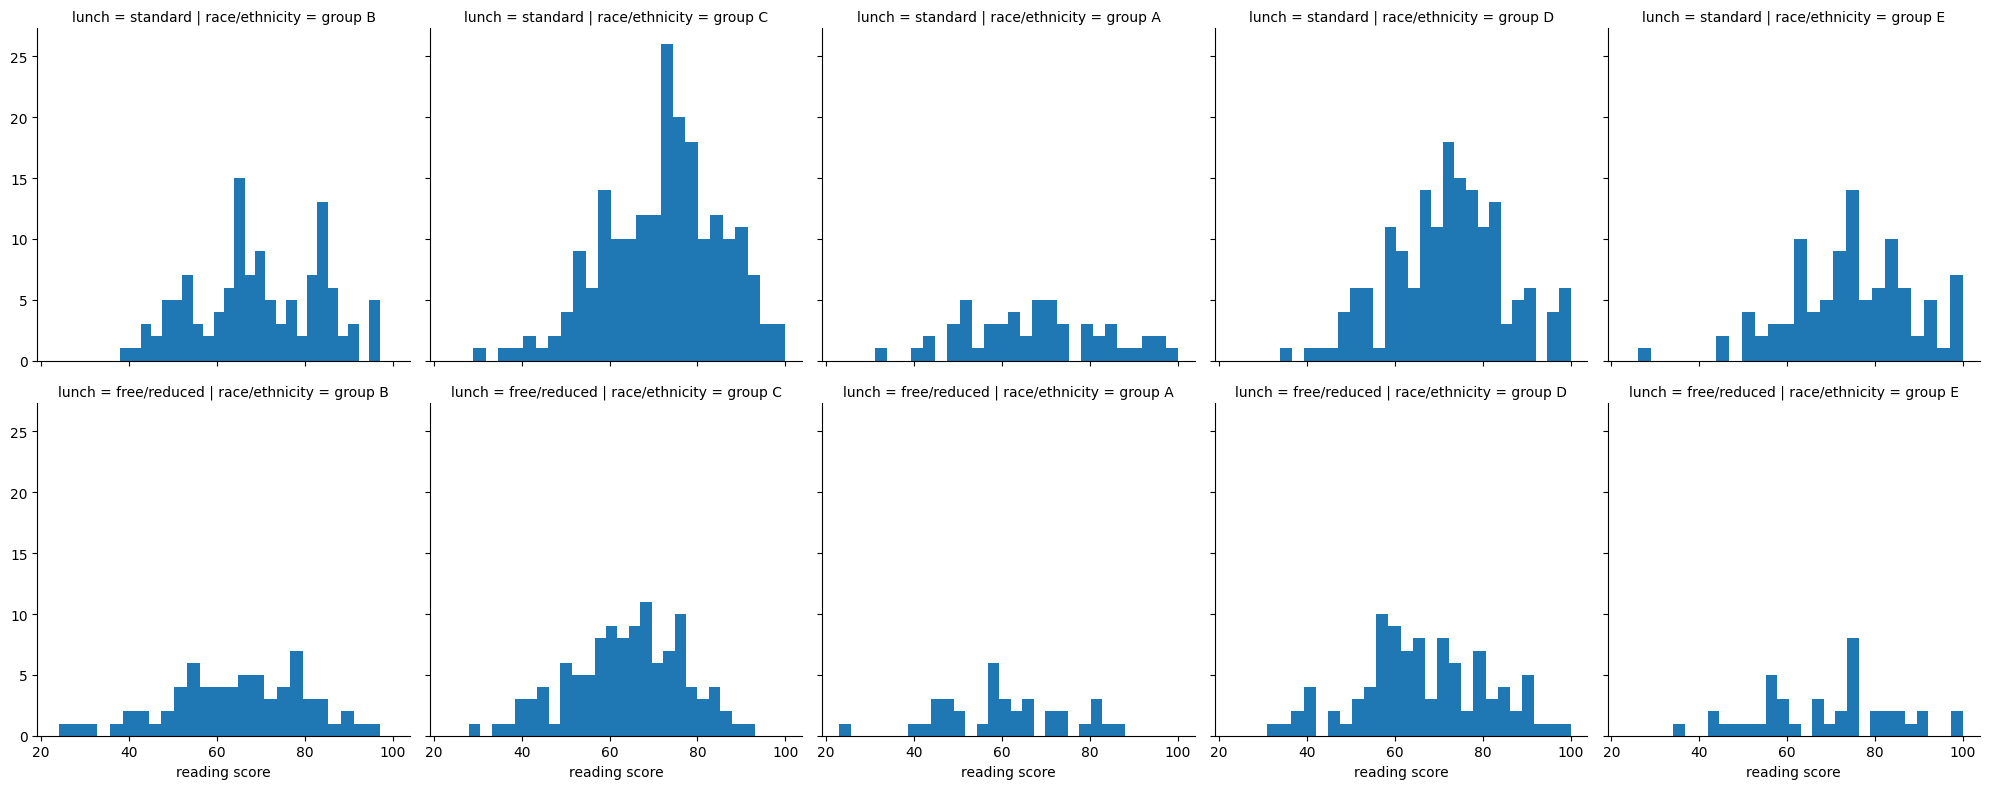

In [46]:
g = sns.FacetGrid(df, col = "race/ethnicity", row = "lunch", height = 4)
g.map(plt.hist,"reading score",bins = 25)

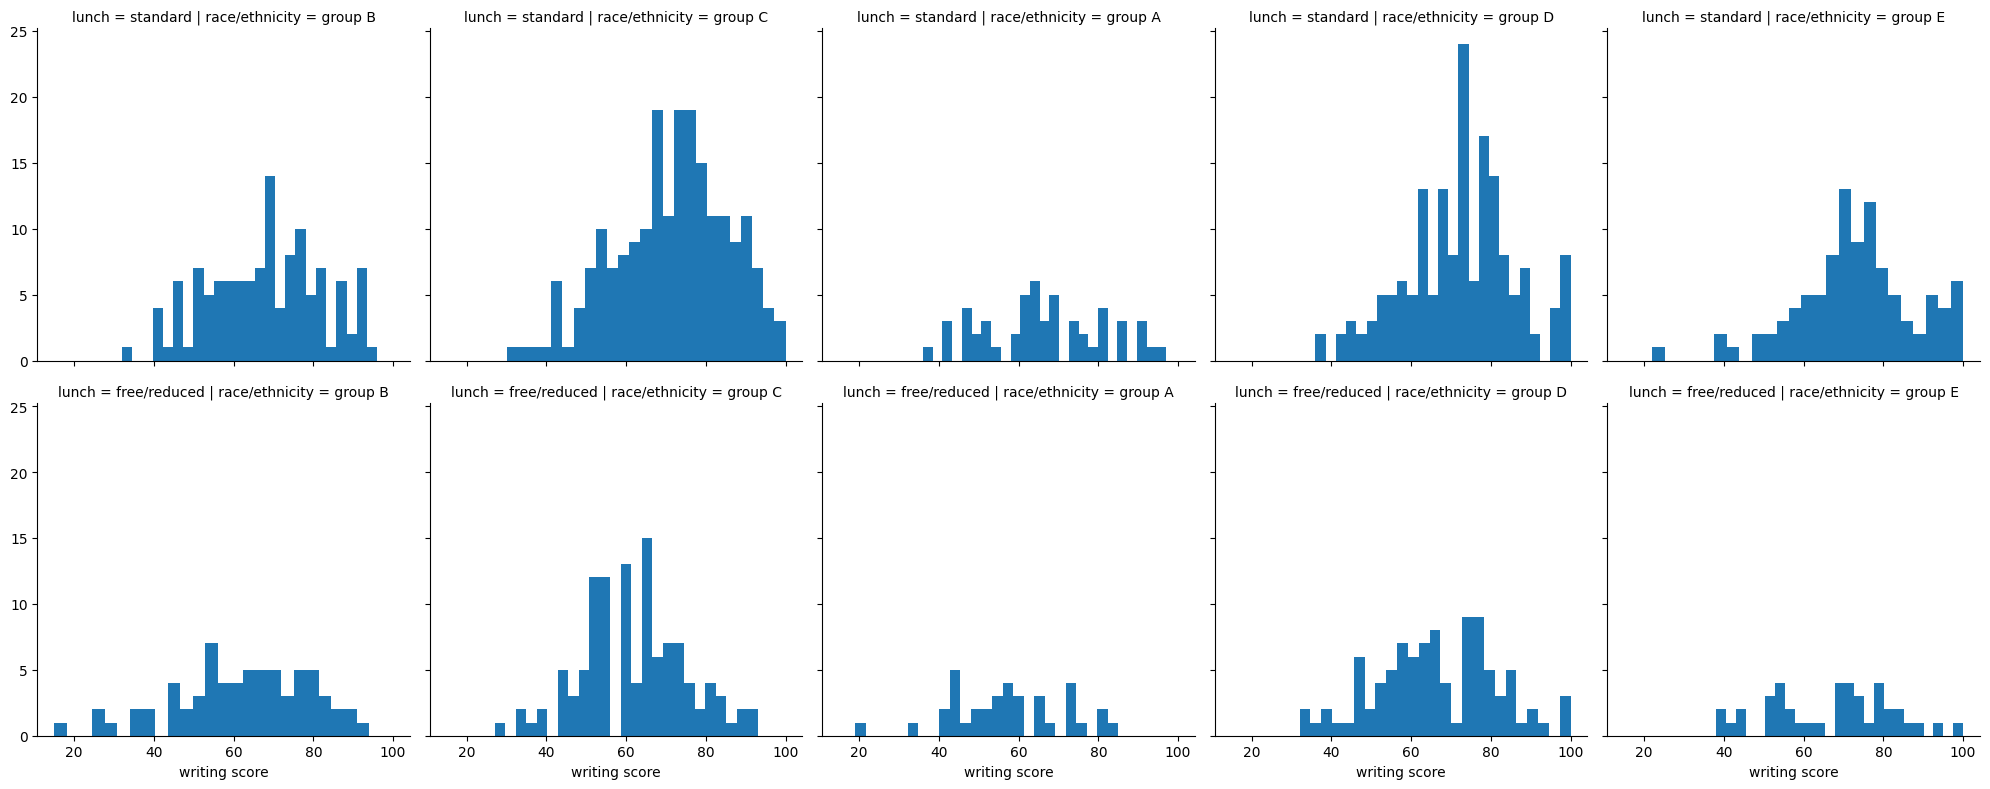

In [47]:
g = sns.FacetGrid(df, col = "race/ethnicity", row = "lunch", height = 4)
g.map(plt.hist,"writing score",bins = 25)

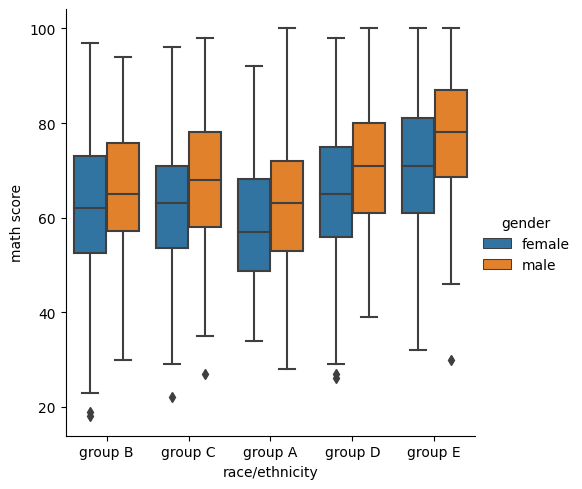

In [48]:
g = sns.catplot(x = "race/ethnicity", y = "math score", hue = "gender", data = df, kind = "box")


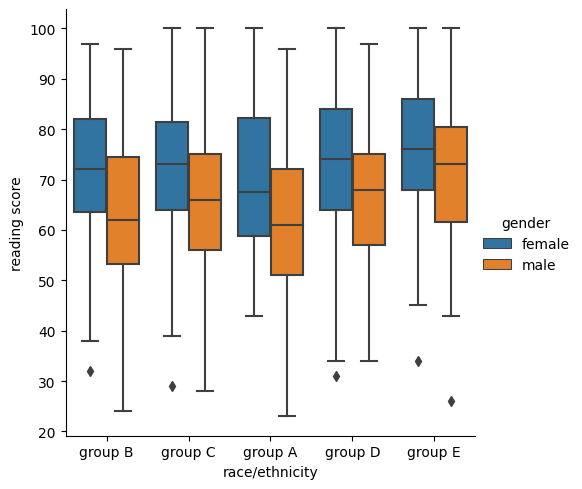

In [49]:
g = sns.catplot(x = "race/ethnicity", y = "reading score", hue = "gender", data = df, kind = "box")


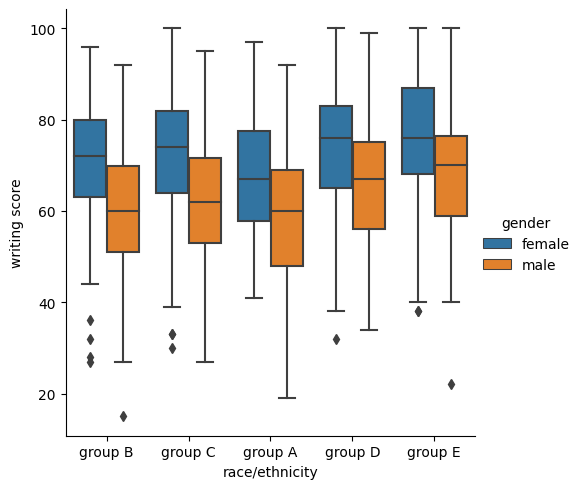

In [50]:
g = sns.catplot(x = "race/ethnicity", y = "writing score", hue = "gender", data = df, kind = "box")


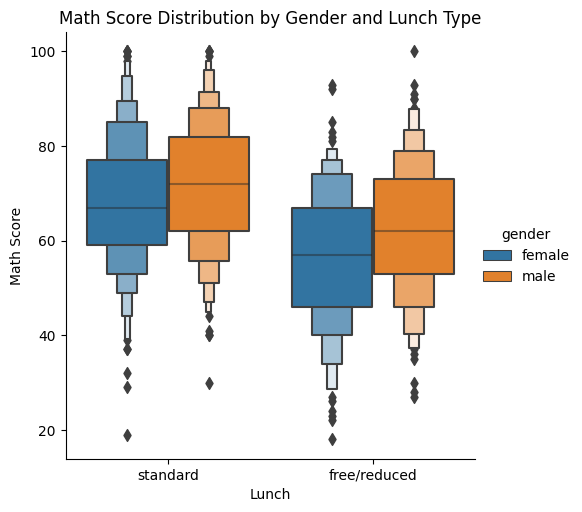

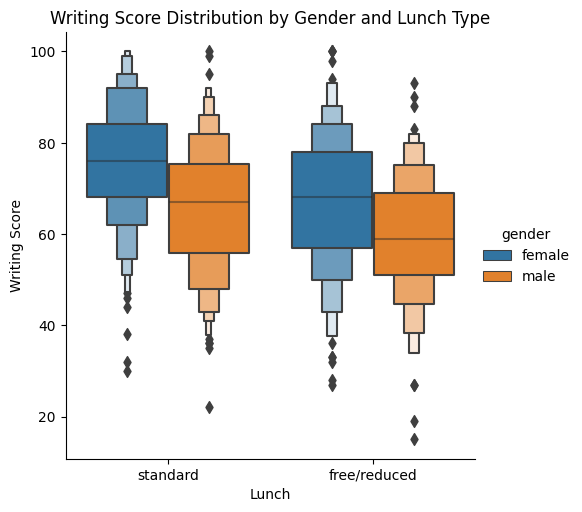

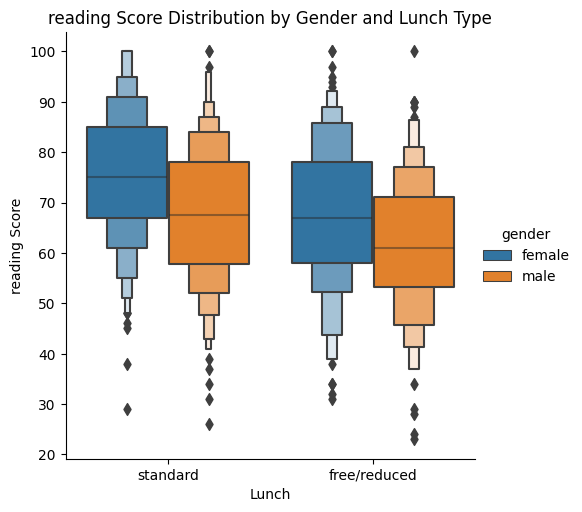

In [51]:
g = sns.catplot(x="lunch", y="math score", hue="gender", data=df, kind="boxen")
g.set_axis_labels("Lunch", "Math Score")
plt.title("Math Score Distribution by Gender and Lunch Type")
plt.show()

g = sns.catplot(x="lunch", y="writing score", hue="gender", data=df, kind="boxen")
g.set_axis_labels("Lunch", "Writing Score")
plt.title("Writing Score Distribution by Gender and Lunch Type")
plt.show()

g = sns.catplot(x="lunch", y="reading score", hue="gender", data=df, kind="boxen")
g.set_axis_labels("Lunch", "reading Score")
plt.title("reading Score Distribution by Gender and Lunch Type")
plt.show()

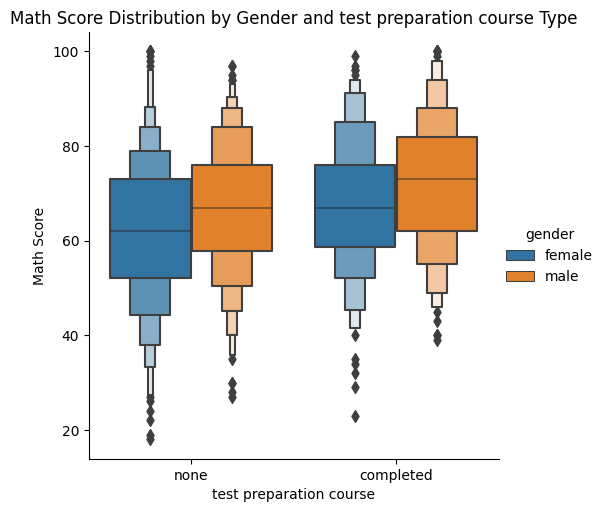

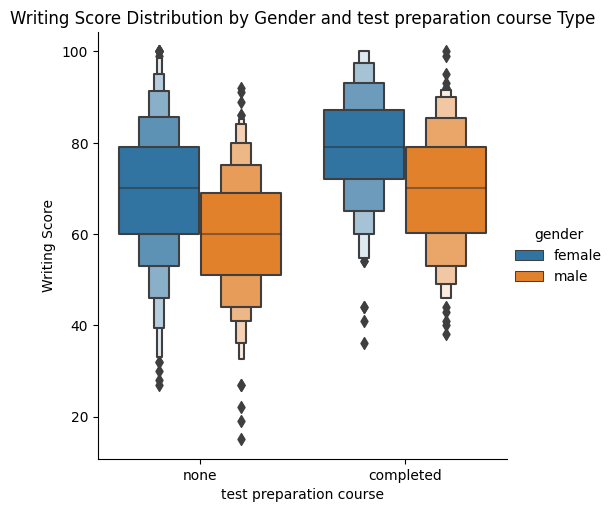

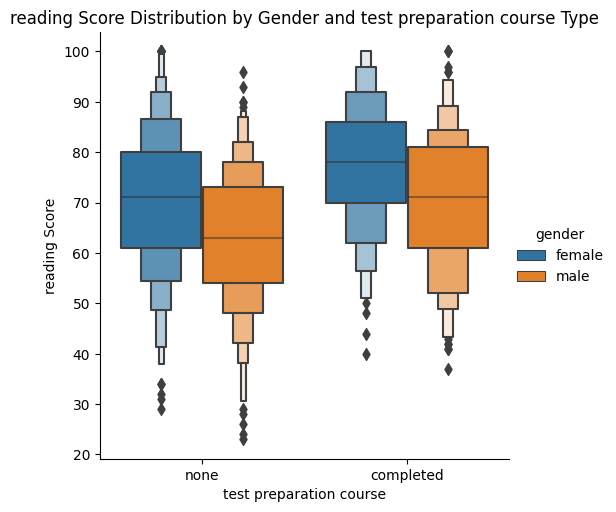

In [52]:
g = sns.catplot(x="test preparation course", y="math score", hue="gender", data=df, kind="boxen")
g.set_axis_labels("test preparation course", "Math Score")
plt.title("Math Score Distribution by Gender and test preparation course Type")
plt.show()

g = sns.catplot(x="test preparation course", y="writing score", hue="gender", data=df, kind="boxen")
g.set_axis_labels("test preparation course", "Writing Score")
plt.title("Writing Score Distribution by Gender and test preparation course Type")
plt.show()

g = sns.catplot(x="test preparation course", y="reading score", hue="gender", data=df, kind="boxen")
g.set_axis_labels("test preparation course", "reading Score")
plt.title("reading Score Distribution by Gender and test preparation course Type")
plt.show()

In [3]:
models = {
                "Linear Regression" : LinearRegression(),
                "KNN" : KNeighborsRegressor(),
                "Decision Tree": DecisionTreeRegressor(),
                "Random Forest": RandomForestRegressor(),
                "Ada Boost": AdaBoostRegressor(),
                "Gradiant Boost": GradientBoostingRegressor(),
                "Cat boost": CatBoostRegressor(),
                "XG Boost": XGBRegressor()
            }


In [11]:
model = []

for i in models:
    model.append(models[i])    

print(model)

[LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), <catboost.core.CatBoostRegressor object at 0x000002072F04F7F0>, XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)]


In [12]:
a = 
for i in models:
    print(i)

Linear Regression
KNN
Decision Tree
Random Forest
Ada Boost
Gradiant Boost
Cat boost
XG Boost


In [17]:
a = models.keys()

In [21]:
a

dict_keys(['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradiant Boost', 'Cat boost', 'XG Boost'])